# Анализ друзей ВКонтакте
1. Проанализировать доли мужчин и женщин среди друзей ВКонтакте

## Настройка библиотек
1. Запрашиваем access token по адресу: https://vkhost.github.io/
2. Получаем ответ и сохраняем в файле token.txt

In [4]:
with open('token.txt') as f:
  token = f.read()

In [119]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [6]:
import requests
from tqdm import tqdm_notebook

In [329]:
pip install ipywidgets

   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.4 kB ? eta -:--:--
   ----------- --------------------------- 41.0/139.4 kB 495.5 kB/s eta 0:00:01
   ---------------------------------------- 139.4/139.4 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/215.0 kB ? eta -:--:--
   -------------------------------- ------- 174.1/215.0 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 215.0/215.0 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------ --------------------------------- 0.4/2.3 MB 7.4 MB/s eta 0:00:01
   ------------ --------------------------- 0.7/2.3 MB 7.7 MB/s eta 0:00:01
   ------------------ --------------------- 1.1/2.3 MB 8.4 MB/s eta 0:00:01
   ------------------ --------------------- 1.1/2.3 MB 8.4 MB/s eta 0:00:01
   ------------------ --------------------- 1.1/2.3 MB 8.4 MB/s eta 0:00:01
   --------------

## Формирование url-запроса

In [262]:
# Выбираем метод из официальной документации
method = 'friends.get'

params = 'user_ids=560276504'

version = '5.199'
url = 'https://api.vk.com/method/' + method + '?' + params + '&v=' + version + '&access_token=' +  token

## Получение айдишников

In [263]:
response = requests.get(url)
response.json()

{'response': {'count': 278,
  'items': [9845,
   46615,
   419835,
   931521,
   1581895,
   1790113,
   3453170,
   4317611,
   6036613,
   9111395,
   15761125,
   19342177,
   19545542,
   20079123,
   20092282,
   24381086,
   25068762,
   30783958,
   31338032,
   38132785,
   41696422,
   41918455,
   47441259,
   54886054,
   56536852,
   62838256,
   63001615,
   64968445,
   65783127,
   68579867,
   72982227,
   74585938,
   77531889,
   79701684,
   86312724,
   88640070,
   90626817,
   91135095,
   92284200,
   94028651,
   95064298,
   95109839,
   95452490,
   97499978,
   98942775,
   99488376,
   107188724,
   109735604,
   113618554,
   115035195,
   117620632,
   119380906,
   122755810,
   123574012,
   124094962,
   124619085,
   126595924,
   133127236,
   133838453,
   135075111,
   135377591,
   135470651,
   135840322,
   136037076,
   136862595,
   138227154,
   138278645,
   138394149,
   138989961,
   139151682,
   139680187,
   140818451,
   142582488,
   1

## Перевод json в list

In [264]:
friend_ids = response.json()['response']['items']

In [265]:
print(friend_ids)

[9845, 46615, 419835, 931521, 1581895, 1790113, 3453170, 4317611, 6036613, 9111395, 15761125, 19342177, 19545542, 20079123, 20092282, 24381086, 25068762, 30783958, 31338032, 38132785, 41696422, 41918455, 47441259, 54886054, 56536852, 62838256, 63001615, 64968445, 65783127, 68579867, 72982227, 74585938, 77531889, 79701684, 86312724, 88640070, 90626817, 91135095, 92284200, 94028651, 95064298, 95109839, 95452490, 97499978, 98942775, 99488376, 107188724, 109735604, 113618554, 115035195, 117620632, 119380906, 122755810, 123574012, 124094962, 124619085, 126595924, 133127236, 133838453, 135075111, 135377591, 135470651, 135840322, 136037076, 136862595, 138227154, 138278645, 138394149, 138989961, 139151682, 139680187, 140818451, 142582488, 142633509, 143570076, 143966876, 144223097, 145226121, 145774069, 146454593, 146527727, 152423416, 152568664, 153174695, 153574575, 153607054, 154314072, 154937726, 155464755, 156589599, 157826836, 158671773, 158999194, 159745320, 160305222, 160333447, 160456

## Перевод list в string

In [266]:
# Переведем список чисел в строку с разделением запятой
friend_ids = ','.join(map(str, friend_ids))

## Создадим для удобства функцию **my_vk_api(method, user_ids, fields)**

In [15]:
def my_vk_api(method, user_ids, fields):
    version = '5.199'
    url = 'https://api.vk.com/method/' + method + '?' +'user_ids=' + user_ids + '&fields=' + fields + '&v=' + version + '&access_token=' +  token
    response = requests.get(url)
    return response.json()['response']

## Протестируем функцию сразу в бою
Узнаем пол всех моих друзей

In [268]:
friends_sex_raw = my_vk_api('users.get', friend_ids, 'sex')

Работает)

## Теперь надо преобразовать json в Pandas DataFrame

In [269]:
print(friends_sex_raw)

[{'id': 9845, 'sex': 2, 'first_name': 'Александр', 'last_name': 'Бобриков', 'can_access_closed': True, 'is_closed': False}, {'id': 46615, 'sex': 2, 'first_name': 'Антон', 'last_name': 'Мандрик', 'can_access_closed': True, 'is_closed': False}, {'id': 419835, 'sex': 2, 'first_name': 'Михаил', 'last_name': 'Вальковский', 'can_access_closed': True, 'is_closed': False}, {'id': 931521, 'sex': 2, 'first_name': 'Роман', 'last_name': 'Себекин', 'can_access_closed': True, 'is_closed': False}, {'id': 1581895, 'sex': 2, 'first_name': 'Сергей', 'last_name': 'Редько', 'can_access_closed': True, 'is_closed': False}, {'id': 1790113, 'sex': 2, 'first_name': 'Кирилл', 'last_name': 'Истомин', 'can_access_closed': True, 'is_closed': False}, {'id': 3453170, 'sex': 1, 'first_name': 'Наталия', 'last_name': 'Орел', 'can_access_closed': True, 'is_closed': False}, {'id': 4317611, 'sex': 2, 'first_name': 'Владимир', 'last_name': 'Аблязов', 'can_access_closed': True, 'is_closed': False}, {'id': 6036613, 'sex': 2,

In [270]:
friends_sex_raw[0].keys()

dict_keys(['id', 'sex', 'first_name', 'last_name', 'can_access_closed', 'is_closed'])

In [271]:
[item['sex'] for item in friends_sex_raw]

[2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,


In [272]:
friends_sex_json = {
    'id': [],
    'sex': []
}

friends_sex_json['id'].extend([item['id'] for item in friends_sex_raw])
friends_sex_json['sex'].extend([item['sex'] for item in friends_sex_raw])

In [273]:
import pandas as pd
df = pd.DataFrame(friends_sex_json)

In [276]:
df = df.replace(1, 'Женщины').replace(2, 'Мужчины')

In [277]:
df.head()

,id,sex
0,9845,Мужчины
1,46615,Мужчины
2,419835,Мужчины
3,931521,Мужчины
4,1581895,Мужчины


## Построим пол моих друзей визуально
1.  Женский
2.  Мужской

<Axes: title={'center': 'Мои друзья ВКонтакте'}, ylabel='id'>

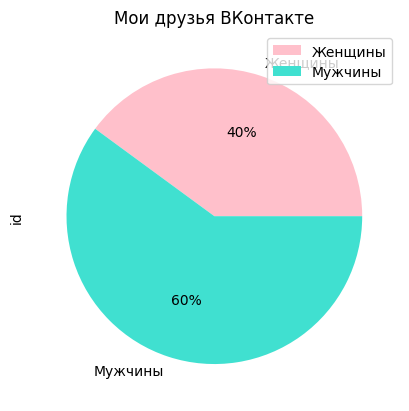

In [279]:
df.groupby(['sex']).count().plot(kind='pie', y='id', title = 'Мои друзья ВКонтакте', autopct='%1.0f%%', colors = ['pink', 'turquoise'])

## Теперь посчитаем пол друзей Алины :)

In [280]:
# Выбираем метод из официальной документации
method = 'friends.get'

params = 'user_id=303943594'

version = '5.199'
url = 'https://api.vk.com/method/' + method + '?' + params + '&v=' + version + '&access_token=' +  token

In [281]:
response = requests.get(url)
response.json()

{'response': {'count': 63,
  'items': [603501,
   4824560,
   5766268,
   11023285,
   14425350,
   24562254,
   47186667,
   59130656,
   60119852,
   63049541,
   77955621,
   94493906,
   113561049,
   123467978,
   123574012,
   136461415,
   141545952,
   145068079,
   150525059,
   158717946,
   160049517,
   162201805,
   168575802,
   176635279,
   188166715,
   188491915,
   196194358,
   196681902,
   211353800,
   218436614,
   225394070,
   226278637,
   243183912,
   260768459,
   270482125,
   288622114,
   296522150,
   302566965,
   318879859,
   328175781,
   333623845,
   378293282,
   381343956,
   384313931,
   408043183,
   427742651,
   428949655,
   429235346,
   444822390,
   465189569,
   465326244,
   475052010,
   509723735,
   515229181,
   519552111,
   519556029,
   560276504,
   611692886,
   627168790,
   728726082,
   746107354,
   780310927,
   804693736]}}

In [282]:
print(url)

https://api.vk.com/method/friends.get?user_id=303943594&v=5.199&access_token=vk1.a.C7GBo5k7gbWPvr9g4ILiD2R2XWpxqO7tNXbj8b0msnXjUBJegMdcg-JJ0Qerg9AnsvQHl9VMo-UBUpyki8JrsZatx_oCYKZMqR-1xCiAX0mX3QDBomKc6yeJuCf6mExxWNfw3hpEhChKZOE3vWG1ezMpbzoscm9bzn2fNDHpZM4zq1MxxvvB_FWlYrlGKljvS8TFBfs87HNM6PAY3k8e3A


In [283]:
response = requests.get(url)
response.json()

{'response': {'count': 63,
  'items': [603501,
   4824560,
   5766268,
   11023285,
   14425350,
   24562254,
   47186667,
   59130656,
   60119852,
   63049541,
   77955621,
   94493906,
   113561049,
   123467978,
   123574012,
   136461415,
   141545952,
   145068079,
   150525059,
   158717946,
   160049517,
   162201805,
   168575802,
   176635279,
   188166715,
   188491915,
   196194358,
   196681902,
   211353800,
   218436614,
   225394070,
   226278637,
   243183912,
   260768459,
   270482125,
   288622114,
   296522150,
   302566965,
   318879859,
   328175781,
   333623845,
   378293282,
   381343956,
   384313931,
   408043183,
   427742651,
   428949655,
   429235346,
   444822390,
   465189569,
   465326244,
   475052010,
   509723735,
   515229181,
   519552111,
   519556029,
   560276504,
   611692886,
   627168790,
   728726082,
   746107354,
   780310927,
   804693736]}}

In [284]:
alinas_friend_ids = response.json()['response']['items']

In [285]:
print(alinas_friend_ids)

[603501, 4824560, 5766268, 11023285, 14425350, 24562254, 47186667, 59130656, 60119852, 63049541, 77955621, 94493906, 113561049, 123467978, 123574012, 136461415, 141545952, 145068079, 150525059, 158717946, 160049517, 162201805, 168575802, 176635279, 188166715, 188491915, 196194358, 196681902, 211353800, 218436614, 225394070, 226278637, 243183912, 260768459, 270482125, 288622114, 296522150, 302566965, 318879859, 328175781, 333623845, 378293282, 381343956, 384313931, 408043183, 427742651, 428949655, 429235346, 444822390, 465189569, 465326244, 475052010, 509723735, 515229181, 519552111, 519556029, 560276504, 611692886, 627168790, 728726082, 746107354, 780310927, 804693736]


In [286]:
# Переведем список чисел в строку с разделением запятой
alinas_friend_ids = ','.join(map(str, alinas_friend_ids))

In [287]:
print(alinas_friend_ids)

603501,4824560,5766268,11023285,14425350,24562254,47186667,59130656,60119852,63049541,77955621,94493906,113561049,123467978,123574012,136461415,141545952,145068079,150525059,158717946,160049517,162201805,168575802,176635279,188166715,188491915,196194358,196681902,211353800,218436614,225394070,226278637,243183912,260768459,270482125,288622114,296522150,302566965,318879859,328175781,333623845,378293282,381343956,384313931,408043183,427742651,428949655,429235346,444822390,465189569,465326244,475052010,509723735,515229181,519552111,519556029,560276504,611692886,627168790,728726082,746107354,780310927,804693736


In [288]:
alinas_friends_sex_raw = my_vk_api('users.get', alinas_friend_ids, 'sex')

In [289]:
print(alinas_friends_sex_raw)

[{'id': 603501, 'sex': 1, 'first_name': 'Елена', 'last_name': 'Кравченко', 'can_access_closed': True, 'is_closed': False}, {'id': 4824560, 'sex': 1, 'first_name': 'Диана', 'last_name': 'Дзгоева', 'can_access_closed': True, 'is_closed': False}, {'id': 5766268, 'sex': 1, 'first_name': 'Анна', 'last_name': 'Волкова', 'can_access_closed': True, 'is_closed': False}, {'id': 11023285, 'sex': 1, 'first_name': 'Ирина', 'last_name': 'Белова', 'can_access_closed': False, 'is_closed': True}, {'id': 14425350, 'sex': 2, 'first_name': 'Александр', 'last_name': 'Кравченко', 'can_access_closed': False, 'is_closed': True}, {'id': 24562254, 'sex': 1, 'first_name': 'Иоланта', 'last_name': 'Усова', 'can_access_closed': True, 'is_closed': False}, {'id': 47186667, 'sex': 1, 'first_name': 'Ольга', 'last_name': 'Малютина-Раель', 'can_access_closed': False, 'is_closed': True}, {'id': 59130656, 'sex': 1, 'first_name': 'Кристина', 'last_name': 'Коняхина', 'can_access_closed': True, 'is_closed': False}, {'id': 601

In [290]:
alinas_friends_sex_json = {
    'id': [],
    'sex': []
}

alinas_friends_sex_json['id'].extend([item['id'] for item in alinas_friends_sex_raw])
alinas_friends_sex_json['sex'].extend([item['sex'] for item in alinas_friends_sex_raw])

In [291]:
import pandas as pd
df = pd.DataFrame(alinas_friends_sex_json)

In [292]:
df = df.replace(1, 'Женщины').replace(2, 'Мужчины')

In [293]:
df.head()

,id,sex
0,603501,Женщины
1,4824560,Женщины
2,5766268,Женщины
3,11023285,Женщины
4,14425350,Мужчины


## Посмотрим пол друзей Алины визуально

<Axes: title={'center': 'Друзья Алины ВКонтакте'}, ylabel='id'>

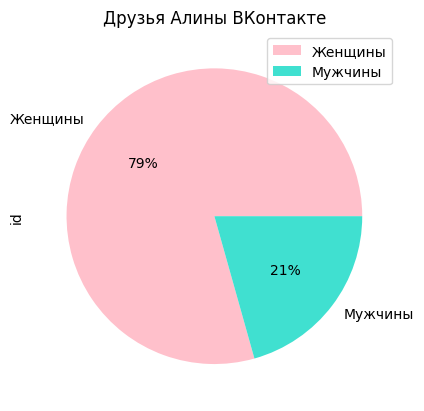

In [294]:
df.groupby(['sex']).count().plot(kind='pie', y='id', title = 'Друзья Алины ВКонтакте', autopct='%1.0f%%', colors = ['pink', 'turquoise'])

## Теперь посчитаем пол друзей любого человека :)

In [7]:
# Выбираем метод из официальной документации
method = 'friends.get'

params = 'user_id=154937726'

version = '5.199'
url = 'https://api.vk.com/method/' + method + '?' + params + '&v=' + version + '&access_token=' +  token

response = requests.get(url)
response.json()

person_friend_ids = response.json()['response']['items']

from tqdm import tqdm_notebook
import time

In [13]:
print(len(person_friend_ids))

1189


In [17]:
person_friends_sex_json = {
    'id': [],
    'sex': []
}

person_friends_count = len(person_friend_ids)

for i in tqdm_notebook(range(0, person_friends_count, 100)):
    time.sleep(0.4)

    # Переведем список чисел в строку с разделением запятой, взяв срез из списка id
    ids = ','.join(map(str, person_friend_ids[:i]))
    person_friend_ids[:i] = []
    
    data = my_vk_api('users.get', ids, 'sex')
    person_friends_sex_json['id'].extend([item['id'] for item in data])
    person_friends_sex_json['sex'].extend([item['sex'] for item in data])

C:\Users\zinov\AppData\Local\Temp\ipykernel_22884\38126921.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, person_friends_count, 100)):


  0%|          | 0/12 [00:00<?, ?it/s]

<Axes: title={'center': 'Друзья Матвея ВКонтакте'}, ylabel='id'>

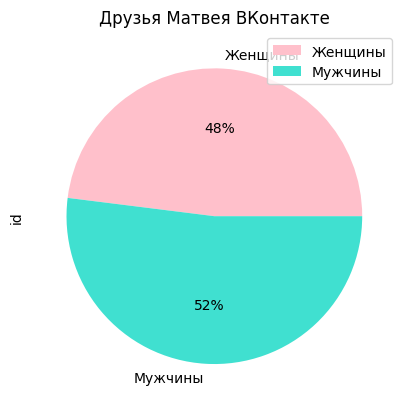

In [18]:
import pandas as pd
df = pd.DataFrame(person_friends_sex_json)

df = df.replace(1, 'Женщины').replace(2, 'Мужчины')

df.groupby(['sex']).count().plot(kind='pie', y='id', title = 'Друзья Матвея ВКонтакте', autopct='%1.0f%%', colors = ['pink', 'turquoise'])

In [19]:
df.head()

,id,sex
0,43293,Мужчины
1,56572,Мужчины
2,177034,Женщины
3,201987,Мужчины
4,240755,Женщины
